In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df= pd.read_csv("SalaryData_Train(1).csv")


In [3]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [7]:
occupations=set(df['occupation'])
print(occupations)

{' Farming-fishing', ' Other-service', ' Sales', ' Craft-repair', ' Adm-clerical', ' Prof-specialty', ' Protective-serv', ' Transport-moving', ' Exec-managerial', ' Priv-house-serv', ' Tech-support', ' Armed-Forces', ' Handlers-cleaners', ' Machine-op-inspct'}


In [8]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [9]:
df['occupation']=df['occupation'].map({' Adm-clerical':0, ' Exec-managerial':1, ' Handlers-cleaners':2,
       ' Prof-specialty':3, ' Other-service':4, ' Sales':5, ' Transport-moving':6,
       ' Farming-fishing':7, ' Machine-op-inspct':8, ' Tech-support':9,
       ' Craft-repair':10, ' Protective-serv':11, ' Armed-Forces':12,
       ' Priv-house-serv':13})

In [10]:
df.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [11]:
df.dropna(axis=1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,1,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,2,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,2,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,3,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,9,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,8,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
Salary=set(df['Salary'])
print(Salary)

{' >50K', ' <=50K'}


In [14]:
from sklearn import preprocessing

In [15]:
df.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [16]:
label_encode=preprocessing.LabelEncoder()

In [17]:
df['Salary']=label_encode.fit_transform(df['Salary'])

In [18]:
df.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

<AxesSubplot:xlabel='education'>

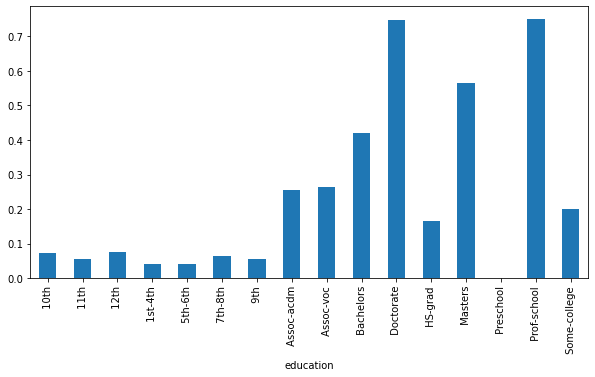

In [19]:
plt.figure(figsize=(10,5))
df.groupby('education').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

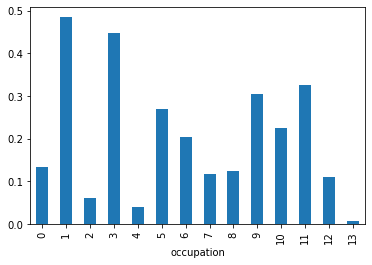

In [20]:
df.groupby('occupation').Salary.mean().plot(kind='bar')

# Applying Support Vector Method

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [24]:
x=df[['educationno','occupation']] #taking only important features
y=df['Salary']


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=100)

In [26]:
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [27]:
score=classifier.score(x_test,y_test)
print(score)

0.7762307309796121


In [28]:
df.sex.value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [29]:
df['sex']=label_encode.fit_transform(df['sex'])

In [30]:
race_set = set(df['race'])
print(race_set)

{' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' White', ' Black'}


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
df['race']=pd.factorize(df['race'])[0]
df.race.value_counts()

0    25932
1     2817
2      895
3      286
4      231
Name: race, dtype: int64

In [33]:
mariatal_status=set(df['maritalstatus'])
print(mariatal_status)

{' Widowed', ' Married-spouse-absent', ' Separated', ' Divorced', ' Married-civ-spouse', ' Married-AF-spouse', ' Never-married'}


In [34]:
df['maritalstatus']=pd.factorize(df['maritalstatus'])[0]
df.maritalstatus.value_counts()

1    14065
0     9725
2     4214
4      939
6      827
3      370
5       21
Name: maritalstatus, dtype: int64

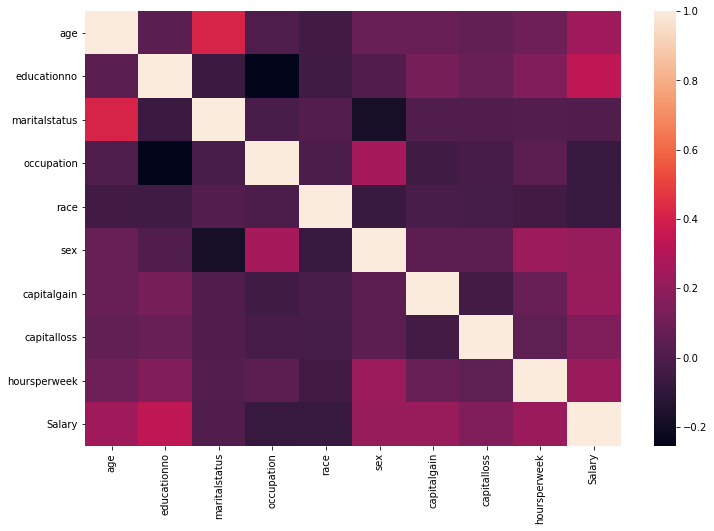

In [35]:
corr=df.corr()
f,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr)
plt.show()

In [36]:
# Taking only the features that is important for now
X = df[['educationno', 'age']]

# Taking the labels (Income)
Y = df['Salary']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [37]:
classi=SVC()
classi.fit(x_train,y_train)

SVC()

In [38]:
score=classi.score(x_test,y_test)
print(score)

0.750704458809879


In [39]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [40]:
x=df[['age','educationno','hoursperweek','capitalgain']]
y=df['Salary']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [42]:
classifier=SVC()
model=classifier.fit(x_train,y_train)

In [43]:
score=model.score(x_test,y_test)
print(score)

0.7945629351309537


 we did it: 79.45%! Nice Just listening to our data we could overcome our intuition and achieve our goal

<AxesSubplot:xlabel='race'>

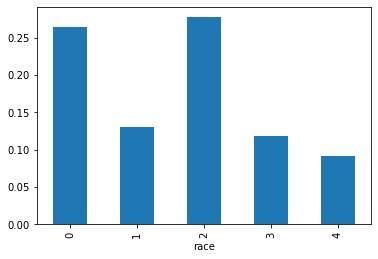

In [44]:
df.groupby('race').Salary.mean().plot(kind='bar')

<AxesSubplot:xlabel='sex'>

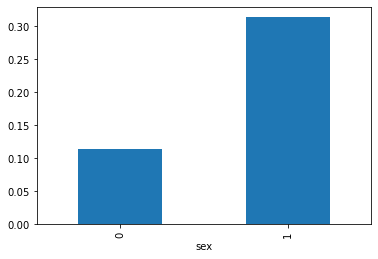

In [45]:
df.groupby('sex').Salary.mean().plot(kind='bar')


<AxesSubplot:xlabel='age'>

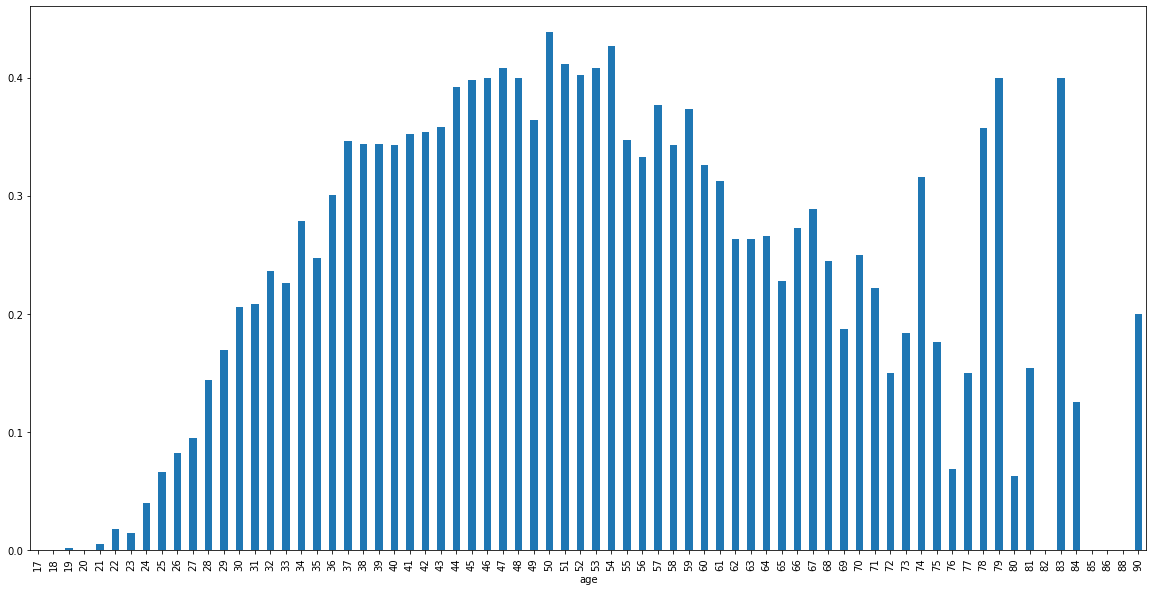

In [47]:
# Mean below 20 years old
plt.figure(figsize=(20,10))
df.groupby('age').Salary.mean().plot(kind='bar')

We achieved our goal by seeing the data closer, trying to understand it's realtions among the features. After that, we explore the data a little bit more and learnt that:

Men have more chances to have a higher income
White and Asian Pacific Islanders have more chances than other races
Income sort of follows the normal deviation, with a peak at 50 years old